In [1]:
!pip install pyspark


In [2]:
# Initialize Spark Session
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Dissertation") \
    .config("spark.some.config.option", "some-value") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read the data into dataframe
df = spark.read.csv('/content/drive/MyDrive/heart_disease_data.csv',inferSchema=True, header =True)
#displaying the cloumns present in the dataset
df.columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [5]:
# print the schema of the file
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: double (nullable = true)
 |-- thal: double (nullable = true)
 |-- target: integer (nullable = true)



In [6]:
df.show(10)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  1|     145| 233|  1|      2|    150|    0|    2.3|    3|0.0| 6.0|     0|
| 67|  1|  4|     160| 286|  0|      2|    108|    1|    1.5|    2|3.0| 3.0|     2|
| 67|  1|  4|     120| 229|  0|      2|    129|    1|    2.6|    2|2.0| 7.0|     1|
| 37|  1|  3|     130| 250|  0|      0|    187|    0|    3.5|    3|0.0| 3.0|     0|
| 41|  0|  2|     130| 204|  0|      2|    172|    0|    1.4|    1|0.0| 3.0|     0|
| 56|  1|  2|     120| 236|  0|      0|    178|    0|    0.8|    1|0.0| 3.0|     0|
| 62|  0|  4|     140| 268|  0|      2|    160|    0|    3.6|    3|2.0| 3.0|     3|
| 57|  0|  4|     120| 354|  0|      0|    163|    1|    0.6|    1|0.0| 3.0|     0|
| 63|  1|  4|     130| 254|  0|      2|    147|    0|    1.4|    2|1.0| 7.0|

In [7]:
# Show distinct values in each column
for col_name in df.columns:
    df.select(col_name).distinct().show()

+---+
|age|
+---+
| 65|
| 53|
| 34|
| 76|
| 44|
| 47|
| 52|
| 40|
| 57|
| 54|
| 48|
| 64|
| 41|
| 43|
| 37|
| 61|
| 35|
| 59|
| 55|
| 39|
+---+
only showing top 20 rows

+---+
|sex|
+---+
|  1|
|  0|
+---+

+---+
| cp|
+---+
|  1|
|  3|
|  4|
|  2|
+---+

+--------+
|trestbps|
+--------+
|     148|
|     155|
|     108|
|     115|
|     101|
|     126|
|     192|
|     128|
|     122|
|     140|
|     132|
|     152|
|     146|
|     142|
|     178|
|     164|
|      94|
|     120|
|     117|
|     154|
+--------+
only showing top 20 rows

+----+
|chol|
+----+
| 243|
| 255|
| 322|
| 321|
| 211|
| 193|
| 126|
| 183|
| 210|
| 300|
| 192|
| 271|
| 253|
| 236|
| 223|
| 417|
| 409|
| 222|
| 330|
| 209|
+----+
only showing top 20 rows

+---+
|fbs|
+---+
|  1|
|  0|
+---+

+-------+
|restecg|
+-------+
|      1|
|      2|
|      0|
+-------+

+-------+
|thalach|
+-------+
|    148|
|    137|
|    133|
|    108|
|    155|
|    115|
|    126|
|    159|
|    192|
|    103|
|    128|
|    122|
| 

In [8]:
from pyspark.sql.functions import col, isnan, when, count

# Find null or missing values in each column
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|  0|  0|  0|       0|   0|  0|      0|      0|    0|      0|    0|  4|   2|     0|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+



In [9]:
# Count the number of rows
print(f"Number of rows: {df.count()}")

Number of rows: 303


In [10]:
# Drop rows with null values in 'ca' and 'thal'
df = df.dropna(subset=["ca", "thal"])


In [11]:
# Find null or missing values in each column
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|  0|  0|  0|       0|   0|  0|      0|      0|    0|      0|    0|  0|   0|     0|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+



In [12]:
df.count()

297

In [13]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler

# Data Preprocessing
# Handle categorical variables (if any)
categorical_cols = [col_name for col_name, dtype in df.dtypes if dtype == 'string']
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

In [14]:
# Ensure 'target' column is indexed if it is categorical
if 'target' not in df.columns:
    raise ValueError("The target column 'target' does not exist in the DataFrame.")
else:
    if 'target_indexed' not in df.columns:
        target_indexer = StringIndexer(inputCol='target', outputCol='target_indexed')
        df = target_indexer.fit(df).transform(df)

In [15]:
from pyspark.sql.functions import when

# Convert the 'target' column to binary values (0 and 1)
df = df.withColumn("target_binary", when(col("target") == 2, 1).otherwise(col("target")))

# Recheck the schema and data
df.printSchema()
df.select("target", "target_binary").distinct().show()


root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: double (nullable = true)
 |-- thal: double (nullable = true)
 |-- target: integer (nullable = true)
 |-- target_indexed: double (nullable = false)
 |-- target_binary: integer (nullable = true)

+------+-------------+
|target|target_binary|
+------+-------------+
|     1|            1|
|     0|            0|
|     3|            3|
|     2|            1|
|     4|            4|
+------+-------------+



In [16]:
# Assemble features into a single vector
feature_cols = [col for col in df.columns if col not in ['target', 'target_binary']]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

In [17]:
# Check the assembled features
df.select("features").show(truncate=False)


+-----------------------------------------------------------------+
|features                                                         |
+-----------------------------------------------------------------+
|[63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0] |
|[67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0] |
|[67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0] |
|[37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0] |
|[41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0] |
|[56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0] |
|[62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0] |
|[57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0] |
|[63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0] |
|[53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0] |
|[57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0.0] |
|[56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3

In [18]:
# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True, withStd=True)
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

Logistic Regression

In [19]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, LinearSVC, NaiveBayes, DecisionTreeClassifier
# Define the Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="scaledFeatures", labelCol="target_binary")

# Set up parameter grid
paramGrid = ParamGridBuilder().addGrid(logistic_regression.regParam, [0.01, 0.1, 1.0]).build()

# Define evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="target_binary", metricName="accuracy")

# Set up CrossValidator
crossval = CrossValidator(estimator=logistic_regression,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)

# Train the model
cv_model = crossval.fit(df)

# Evaluate the model
accuracy_lr = evaluator.evaluate(cv_model.transform(df))
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.9461279461279462


Random Forest

In [20]:
from pyspark.ml.classification import RandomForestClassifier

# Define the Random Forest model
random_forest = RandomForestClassifier(featuresCol="scaledFeatures", labelCol="target_binary")

# Set up parameter grid
paramGrid = ParamGridBuilder().addGrid(random_forest.numTrees, [10, 20]).build()

# Set up CrossValidator
crossval = CrossValidator(estimator=random_forest,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)

# Train the model
cv_model = crossval.fit(df)

# Evaluate the model
accuracy_rf = evaluator.evaluate(cv_model.transform(df))
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9966329966329966


Decision Tree

In [21]:
from pyspark.ml.classification import DecisionTreeClassifier

# Define the Decision Tree model
decision_tree = DecisionTreeClassifier(featuresCol="scaledFeatures", labelCol="target_binary")

# Set up parameter grid
paramGrid = ParamGridBuilder().addGrid(decision_tree.maxDepth, [5, 10]).build()

# Set up CrossValidator
crossval = CrossValidator(estimator=decision_tree,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)

# Train the model
cv_model = crossval.fit(df)

# Evaluate the model
accuracy_dt = evaluator.evaluate(cv_model.transform(df))
print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Accuracy: 1.0


In [22]:
from pyspark.sql.functions import col

# Check distinct values in the target column
df.select("target").distinct().show()

# Convert target to binary (if necessary)
# Assuming target values should be {0, 1}
df = df.withColumn("target_binary", col("target").cast("double"))


+------+
|target|
+------+
|     1|
|     3|
|     4|
|     2|
|     0|
+------+



In [23]:
df.select("target_binary").distinct().show()

+-------------+
|target_binary|
+-------------+
|          0.0|
|          1.0|
|          4.0|
|          3.0|
|          2.0|
+-------------+



In [24]:
from pyspark.sql.functions import when

# Convert target values to binary (e.g., map all non-zero to 1.0)
df = df.withColumn("target_binary", when(col("target_binary") > 0, 1.0).otherwise(0.0))

# Check distinct values to confirm conversion
df.select("target_binary").distinct().show()


+-------------+
|target_binary|
+-------------+
|          0.0|
|          1.0|
+-------------+



Gradient Boosting Tree

In [25]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define the Gradient-Boosted Trees model
gbt = GBTClassifier(featuresCol="scaledFeatures", labelCol="target_binary")

# Set up parameter grid
paramGrid = ParamGridBuilder().addGrid(gbt.maxIter, [10, 20]).build()

# Define evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="target_binary", metricName="accuracy")

# Set up CrossValidator
crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)

# Train the model
cv_model = crossval.fit(df)

# Evaluate the model
accuracy_gbt = evaluator.evaluate(cv_model.transform(df))
print(f"Gradient-Boosted Trees Accuracy: {accuracy_gbt}")


Gradient-Boosted Trees Accuracy: 1.0


Support Vector Machine

In [26]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define the Support Vector Machine model
svm = LinearSVC(featuresCol="scaledFeatures", labelCol="target_binary")

# Set up parameter grid
paramGrid = ParamGridBuilder().addGrid(svm.regParam, [0.01, 0.1, 1.0]).build()

# Define evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="target_binary", metricName="accuracy")

# Set up CrossValidator
crossval = CrossValidator(estimator=svm,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)

# Train the model
cv_model = crossval.fit(df)

# Evaluate the model
accuracy_svc = evaluator.evaluate(cv_model.transform(df))
print(f"Support Vector Machine Accuracy: {accuracy_svc}")


Support Vector Machine Accuracy: 1.0


In [28]:
import pandas as pd

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "Accuracy"])

# Adding results to the DataFrame
results_df = pd.concat([results_df, pd.DataFrame([{"Model": "Logistic Regression", "Accuracy": accuracy_lr}])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([{"Model": "Random Forest", "Accuracy": accuracy_rf}])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([{"Model": "Decision Tree", "Accuracy": accuracy_dt}])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([{"Model": "Gradient Boosting Tree", "Accuracy": accuracy_gbt}])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([{"Model": "Support Vector Machine", "Accuracy": accuracy_svc}])], ignore_index=True)


# Display the results DataFrame
print(results_df)



                    Model  Accuracy
0     Logistic Regression  0.946128
1           Random Forest  0.996633
2           Decision Tree  1.000000
3  Gradient Boosting Tree  1.000000
4  Support Vector Machine  1.000000


<ipython-input-28-8cd86aff965a>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{"Model": "Logistic Regression", "Accuracy": accuracy_lr}])], ignore_index=True)


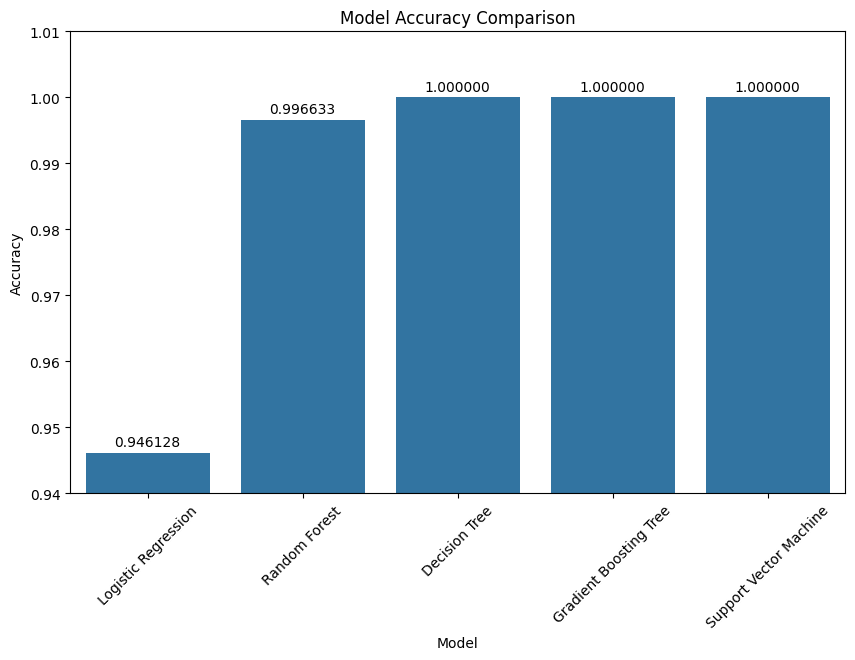

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the accuracies
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
# Add accuracy values on top of each bar with full precision
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar (i.e., the accuracy)
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height + 0.001,  # Y position: just above the top of the bar
        f'{height:.6f}',  # Text: format the accuracy value with 6 decimal places
        ha="center"  # Center-align the text
    )

plt.ylim(0.94, 1.01)  # Adjust y-axis limits to better visualize small differences
plt.show()
